# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

## Importing the dataset

In [2]:
chocoRaw = pd.read_csv('chocolate.csv')

## Examining basic infos 

In [3]:
chocoRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2224 non-null   int64  
 1   ref                               2224 non-null   int64  
 2   company                           2224 non-null   object 
 3   company_location                  2224 non-null   object 
 4   review_date                       2224 non-null   int64  
 5   country_of_bean_origin            2224 non-null   object 
 6   specific_bean_origin_or_bar_name  2224 non-null   object 
 7   cocoa_percent                     2224 non-null   float64
 8   rating                            2224 non-null   float64
 9   counts_of_ingredients             2224 non-null   int64  
 10  beans                             2224 non-null   object 
 11  cocoa_butter                      2224 non-null   object 
 12  vanill

# Cleaning the dataset

## Dropping redundant columns

Some columns such as `ref`, `company`, `review_date` or `company_location` are variables that can not be controlled when creating a chocolate bar, which should be removed. `specific_bean_origin_or_bar_name` is also removed because it is too specific, and there are too many minority variables.

In [4]:
choc = pd.DataFrame(chocoRaw.drop(columns=['Unnamed: 0', 'ref', 'company', 'company_location', 'review_date', 'beans', 'specific_bean_origin_or_bar_name']))

## Filling NaN values in taste columns with "no taste"

In [5]:
choc.fillna("no taste",inplace = True)

## Changing the values of ingredients to integer

We replaced the values in the ingredients columns to cater to future machine learning model usage.
- "have" changed into 1
- "not_have" changed into 0

In [6]:
choc['cocoa_butter'] = choc['cocoa_butter'].replace('have_cocoa_butter' , 1)
choc['cocoa_butter'] = choc['cocoa_butter'].replace('have_not_cocoa_butter' , 0)

choc['vanilla'] = choc['vanilla'].replace('have_vanila' , 1)
choc['vanilla'] = choc['vanilla'].replace('have_not_vanila' , 0)

choc['lecithin'] = choc['lecithin'].replace('have_lecithin' , 1)
choc['lecithin'] = choc['lecithin'].replace('have_not_lecithin' , 0)

choc['salt'] = choc['salt'].replace('have_salt' , 1)
choc['salt'] = choc['salt'].replace('have_not_salt' , 0)

choc['sugar'] = choc['sugar'].replace('have_sugar' , 1)
choc['sugar'] = choc['sugar'].replace('have_not_sugar' , 0)

choc['sweetener_without_sugar'] = choc['sweetener_without_sugar'].replace('have_sweetener_without_sugar' , 1)
choc['sweetener_without_sugar'] = choc['sweetener_without_sugar'].replace('have_not_sweetener_without_sugar' , 0)

## Reclassifying rating 

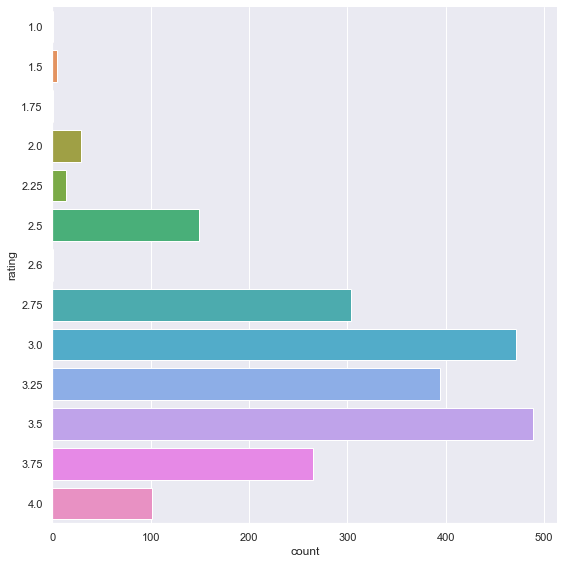

In [7]:
sb.catplot(y = "rating", data = choc, kind = "count", height = 8)

As we can see, the rating data are too imbalanced, with a heavy skew towards the higher rating. Therefore, we reclassify them into 2 categories, which helps with reducing class imbalance, without too much oversampling or downscaling:
- rating <= 3: "low and mid"
- 3 < rating <= 4: "high"<br>

Once again, we assign numerical values to the new ratings:
- "high" = 1
- "low and mid" = 0

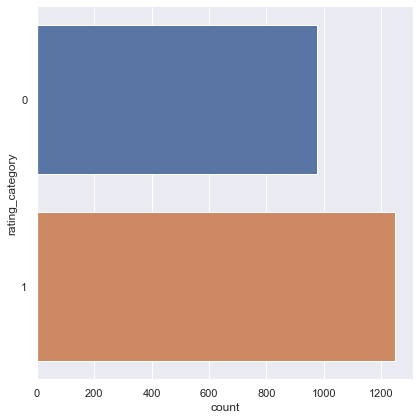

In [8]:
conditions = [(choc['rating'] <= 3),
              (choc['rating'] > 3) & (choc['rating'] <= 4)]

values = [0, 1]

choc['rating_category'] = np.select(conditions, values)
swap = choc.pop('rating_category')
choc.insert(2,'rating_category', swap)
choc['rating_category'] = choc['rating_category']

sb.catplot(y = 'rating_category', data = choc, kind = 'count', height = 6)
plt.show()

The different ratings are now much more balanced.

## Adding "number_of_taste" column

There are data on number of ingredients, so we believe there should be data on number of taste as well.

In [9]:
choc['number_of_taste'] = choc.apply(lambda row: 4 - sum(row[0:2223]=='no taste'), axis = 1).astype('category')
choc

,country_of_bean_origin,cocoa_percent,rating_category,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,number_of_taste
0,Madagascar,76.0,1,3.75,3,1,0,0,0,1,0,cocoa,blackberry,full body,no taste,3
1,Dominican republic,76.0,1,3.50,3,1,0,0,0,1,0,cocoa,vegetal,savory,no taste,3
2,Tanzania,76.0,1,3.25,3,1,0,0,0,1,0,rich cocoa,fatty,bready,no taste,3
3,Peru,63.0,1,3.75,4,1,0,1,0,1,0,fruity,melon,roasty,no taste,3
4,Bolivia,70.0,1,3.50,4,1,0,1,0,1,0,vegetal,nutty,no taste,no taste,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Blend,80.0,0,2.75,4,1,0,0,1,0,1,waxy,cloying,vegetal,no taste,3
2220,Colombia,75.0,1,3.75,3,1,0,0,0,1,0,strong nutty,marshmallow,no taste,no taste,2
2221,Belize,72.0,1,3.50,3,1,0,0,0,1,0,muted,roasty,accessible,no taste,3
2222,Congo,70.0,1,3.25,3,1,0,0,0,1,0,fatty,mild nuts,mild fruit,no taste,3


In [10]:
choc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   country_of_bean_origin   2224 non-null   object  
 1   cocoa_percent            2224 non-null   float64 
 2   rating_category          2224 non-null   int32   
 3   rating                   2224 non-null   float64 
 4   counts_of_ingredients    2224 non-null   int64   
 5   cocoa_butter             2224 non-null   int64   
 6   vanilla                  2224 non-null   int64   
 7   lecithin                 2224 non-null   int64   
 8   salt                     2224 non-null   int64   
 9   sugar                    2224 non-null   int64   
 10  sweetener_without_sugar  2224 non-null   int64   
 11  first_taste              2224 non-null   object  
 12  second_taste             2224 non-null   object  
 13  third_taste              2224 non-null   object  
 14  fourth_t

In [11]:
choc.to_csv('cleaned_chocolate.csv', index = False)